In [4]:
import pandas as pd

# Replace 'filename.csv' with the actual path to your CSV file
df = pd.read_csv('housing.csv')

# To preview the first 5 rows
print(df.head(5))
print(df.tail(5))

df.info()
df.describe()

   LotArea  OverallQual  YearBuilt Neighborhood HouseStyle  FullBath  \
0    10270            4       1957      OldTown     1.5Fin         1   
1     3860           10       1950      Edwards       SLvl         1   
2     8390            3       1957      Edwards     1.5Fin         2   
3     8191            9       1978        NAmes       SLvl         2   
4    14964            2       1954      CollgCr     2Story         3   

   GarageCars  GarageArea  SalePrice  
0           3         241      72380  
1           0         293      98692  
2           1         919      46028  
3           3         562     133111  
4           3         265      45388  
     LotArea  OverallQual  YearBuilt Neighborhood HouseStyle  FullBath  \
995     7632            4       2010      OldTown       SLvl         1   
996     9288            7       1998      CollgCr     SFoyer         1   
997     6596            4       1995        NAmes     2Story         2   
998    14475            2       2011 

,LotArea,OverallQual,YearBuilt,FullBath,GarageCars,GarageArea,SalePrice
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9085.771000,5.446000,1984.978000,2.026000,1.475000,492.001000,76601.576000
std,3391.665798,2.881907,21.232672,0.820974,1.099356,289.401573,32638.190497
min,3004.000000,1.000000,1950.000000,1.000000,0.000000,0.000000,-5401.000000
25%,6294.750000,3.000000,1967.000000,1.000000,1.000000,236.000000,50919.750000
50%,9117.000000,5.000000,1984.000000,2.000000,1.000000,483.500000,77047.500000
75%,11902.000000,8.000000,2003.000000,3.000000,2.000000,740.500000,103164.750000
max,14990.000000,10.000000,2022.000000,3.000000,3.000000,999.000000,158306.000000


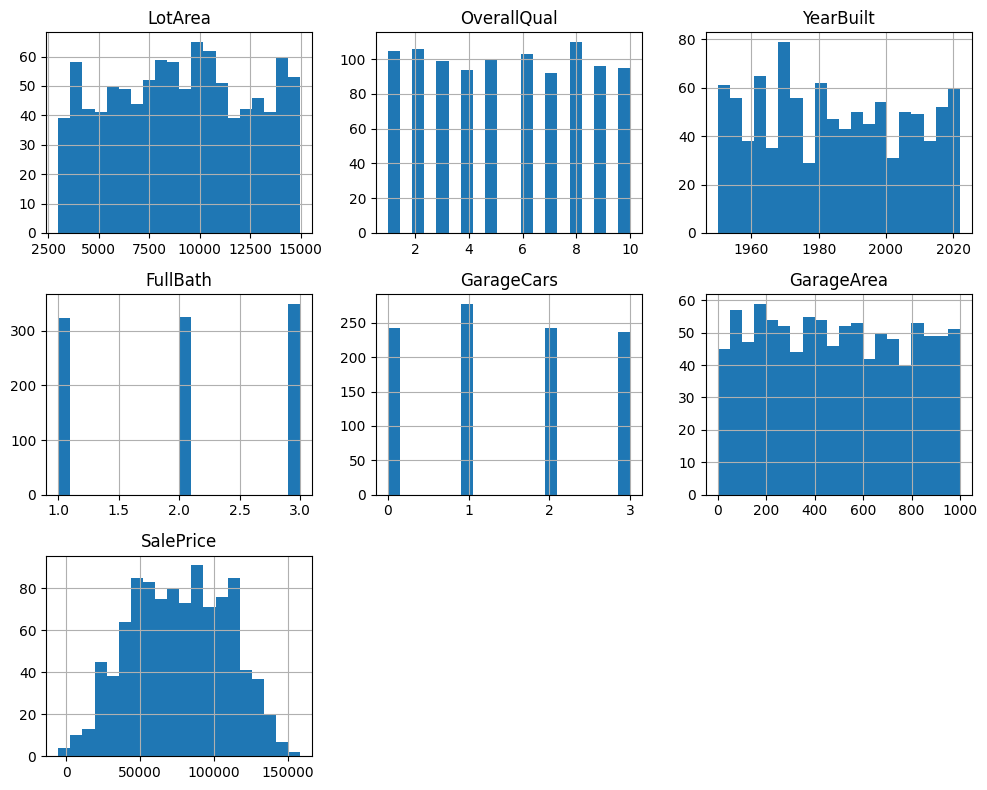

In [8]:
import matplotlib.pyplot as plt

# Display histograms for all numeric columns
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()


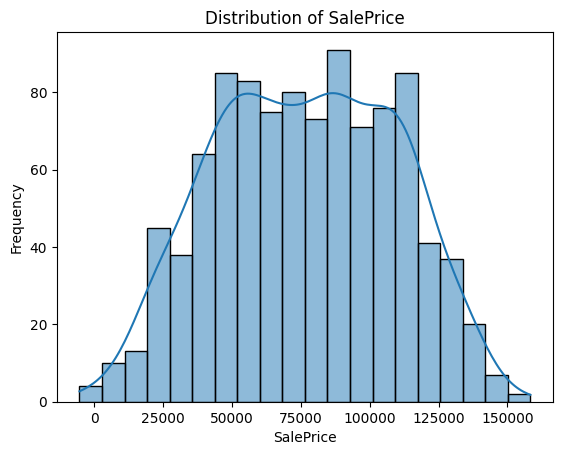

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for a single numeric column, e.g., 'SalePrice'
sns.histplot(df['SalePrice'], kde=True, bins=20)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


Top 5 rows:
    LotArea  OverallQual  YearBuilt Neighborhood HouseStyle  FullBath  \
0    10270            4       1957      OldTown     1.5Fin         1   
1     3860           10       1950      Edwards       SLvl         1   
2     8390            3       1957      Edwards     1.5Fin         2   
3     8191            9       1978        NAmes       SLvl         2   
4    14964            2       1954      CollgCr     2Story         3   

   GarageCars  GarageArea  SalePrice  
0           3         241      72380  
1           0         293      98692  
2           1         919      46028  
3           3         562     133111  
4           3         265      45388  

Bottom 5 rows:
      LotArea  OverallQual  YearBuilt Neighborhood HouseStyle  FullBath  \
995     7632            4       2010      OldTown       SLvl         1   
996     9288            7       1998      CollgCr     SFoyer         1   
997     6596            4       1995        NAmes     2Story         2   
998    

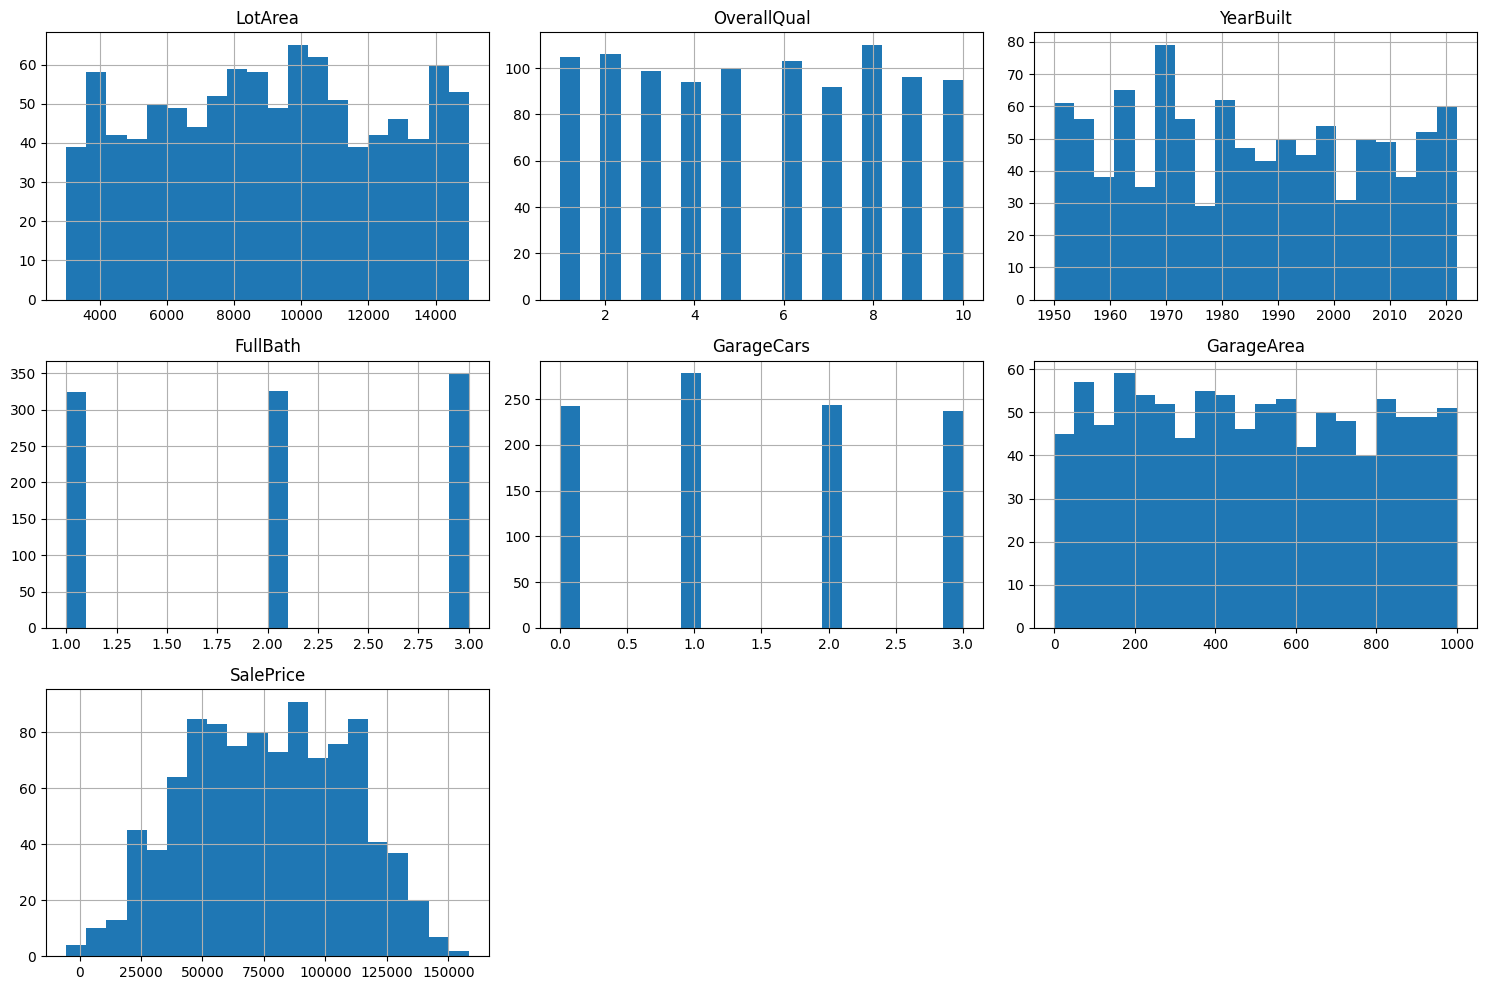


Null values in each column:
 LotArea         0
OverallQual     0
YearBuilt       0
Neighborhood    0
HouseStyle      0
FullBath        0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

Numeric Fields:
['LotArea', 'OverallQual', 'YearBuilt', 'FullBath', 'GarageCars', 'GarageArea', 'SalePrice']


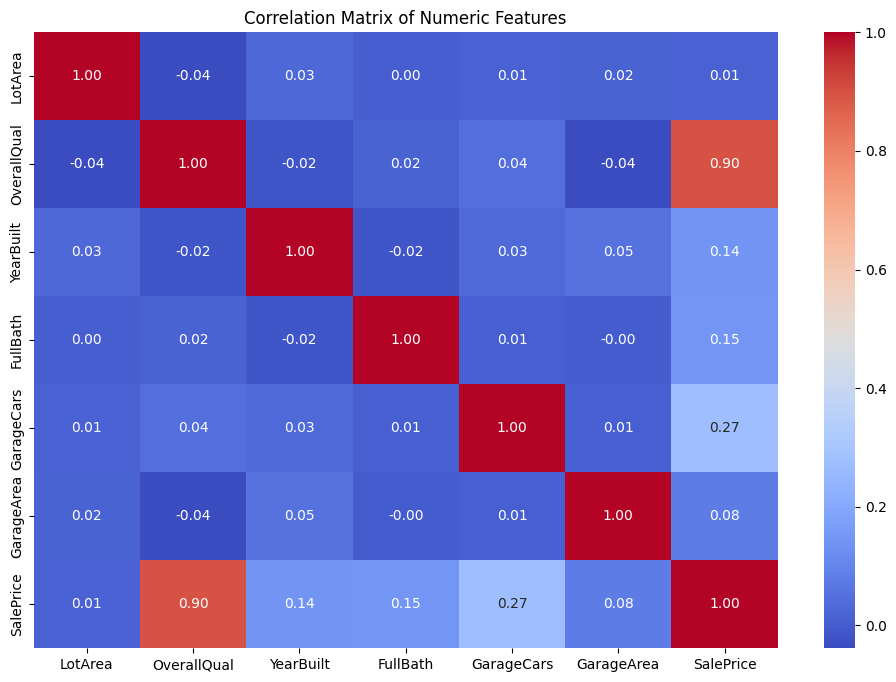


Categorical Features:
['Neighborhood', 'HouseStyle']

Nominal Features: ['Neighborhood', 'HouseStyle']
Ordinal Features: ['OverallQual', 'ExterCond']


KeyError: "['ExterCond'] not in index"

In [9]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Import the data file (update filename if needed)
df = pd.read_csv("housing.csv")  # replace with actual filename

# Step 3: Display the contents (top and bottom 5 rows)
print("Top 5 rows:\n", df.head())
print("\nBottom 5 rows:\n", df.tail())

# Step 4: Display histograms of some numeric fields
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Step 5: Find out null values in the data
null_counts = df.isnull().sum()
print("\nNull values in each column:\n", null_counts)

# Optional: Drop or fill null values (e.g., fill numeric with median)
df_filled = df.fillna(df.median(numeric_only=True))

# Step 6: Find out which are the numeric fields
print("\nNumeric Fields:")
print(numeric_cols.tolist())

# Step 7: Analyze correlations between numeric features
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Step 8: List categorical features
categorical_cols = df.select_dtypes(include='object').columns
print("\nCategorical Features:")
print(categorical_cols.tolist())

# Optional: Divide into nominal and ordinal if known
nominal_features = ['Neighborhood', 'HouseStyle']  # example
ordinal_features = ['OverallQual', 'ExterCond']    # example

print("\nNominal Features:", nominal_features)
print("Ordinal Features:", ordinal_features)

# Step 9: Convert ordinal features to nominal using One-Hot Encoding

# 1. Convert ordinal columns to string to treat them as nominal
df_filled[ordinal_features] = df_filled[ordinal_features].astype(str)

# 2. Apply One-Hot Encoding to ordinal features
df_encoded = pd.get_dummies(df_filled, columns=ordinal_features)

# 3. (Optional) Also encode nominal features if needed
df_encoded = pd.get_dummies(df_encoded, columns=nominal_features)

# Display the updated column names after encoding
print("\nData after One-Hot Encoding - Columns:\n", df_encoded.columns.tolist())


In [12]:
# Step 9: Convert ordinal features to nominal using One-Hot Encoding

# 1. Convert ordinal columns to string to treat them as nominal
print(df_filled)
print(ordinal_features)
df_filled[ordinal_features] = df_filled[ordinal_features].astype(str)
#print(ordinal_features)

# 2. Apply One-Hot Encoding to ordinal features
#df_encoded = pd.get_dummies(df_filled, columns=ordinal_features)

# 3. (Optional) Also encode nominal features if needed
#df_encoded = pd.get_dummies(df_encoded, columns=nominal_features)

# Display the updated column names after encoding
#print("\nData after One-Hot Encoding - Columns:\n", df_encoded.columns.tolist())


     LotArea  OverallQual  YearBuilt Neighborhood HouseStyle  FullBath  \
0      10270            4       1957      OldTown     1.5Fin         1   
1       3860           10       1950      Edwards       SLvl         1   
2       8390            3       1957      Edwards     1.5Fin         2   
3       8191            9       1978        NAmes       SLvl         2   
4      14964            2       1954      CollgCr     2Story         3   
..       ...          ...        ...          ...        ...       ...   
995     7632            4       2010      OldTown       SLvl         1   
996     9288            7       1998      CollgCr     SFoyer         1   
997     6596            4       1995        NAmes     2Story         2   
998    14475            2       2011        NAmes     2Story         1   
999     9168           10       1957        NAmes     2Story         1   

     GarageCars  GarageArea  SalePrice  
0             3         241      72380  
1             0         293  

KeyError: "['ExterCond'] not in index"